### Loading necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import cv2

In [3]:
dir="C:/Users/PC-ACER/Downloads/SkiCraft Technology/Task3 Dataset/train"

### Data Analysis

#### Display first image in the dataset

In [4]:
for img in os.listdir(dir):
    imgpath=os.path.join(dir,img)
    pet_img=cv2.imread(imgpath,0)
    cv2.imshow("image",pet_img)
    cv2.waitKey(0)
    break

#### Labeling the dataset

In [5]:
categories=["cat","dog"]

In [53]:
data=[]
for img in os.listdir(dir):
    
    #image_path
    imgpath=os.path.join(dir,img)
    pet_img=cv2.imread(imgpath,0)
    
    #resize image to (50X50)
    pet_img=cv2.resize(pet_img,(50,50))
    image=np.array(pet_img).flatten()
    
    #labeling the dataset - cat : 0 , dog : 1
    if img[:3]==categories[0] :
        data.append([image,0])
    else:
        data.append([image,1])

In [17]:
print("Total no. of images in dataset :",len(data))

Total no. of images in dataset : 25000


In [61]:
data[12499]

[array([38, 26, 33, ..., 79, 80, 81], dtype=uint8), 0]

In [62]:
data[12500]

[array([110, 161, 158, ...,  75,  78,  76], dtype=uint8), 1]

### Saving the new data

In [6]:
import pickle

In [66]:
pick_in=open("final_data.pickle","wb")
pickle.dump(data,pick_in)
pick_in.close()

### Loading the new data

In [7]:
pick_in=open("final_data.pickle","rb")
data=pickle.load(pick_in)
pick_in.close()

In [8]:
print("Length of data :",len(data))

Length of data : 25000


In [9]:
data[0]

[array([172, 180, 186, ...,   2,   2,   2], dtype=uint8), 0]

### Extracting feature and label column from dataset

In [10]:
import random

In [11]:
random.shuffle(data)

In [12]:
features=[]
labels=[]

for feature,label in data:
    features.append(feature)
    labels.append(label)

In [13]:
print("length of features :",len(features))

length of features : 25000


In [14]:
features[0]

array([163, 165, 163, ..., 143, 142, 141], dtype=uint8)

In [15]:
print("Length of labels :",len(labels))

Length of labels : 25000


In [16]:
labels[0]

0

### Applying ML model : SVM

In [12]:
X=features
Y=labels

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=45)

In [22]:
print("Length of X_train :",len(X_train))
print("Length of X_test :",len(X_test))

Length of X_train : 20000
Length of X_test : 5000


In [24]:
from sklearn.svm import SVC

In [25]:
clf=SVC(kernel="poly",gamma="auto")

In [26]:
clf.fit(X_train,Y_train)

SVC(gamma='auto', kernel='poly')

### Saving Model

In [ ]:
pick=open("model.pkl","wb")
pickle.dump(clf,pick)
pick.close()

### Loading model

In [15]:
pick=open("model.pkl","rb")
model=pickle.load(pick)
pick.close

<function BufferedReader.close>

In [16]:
Y_pred=model.predict(X_test)

In [17]:
Y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

### Predicting 6th datapoint in Xtest

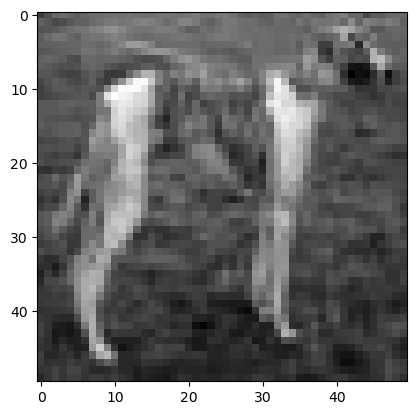

In [65]:
pet=X_test[5].reshape(50,50)
plt.imshow(pet,cmap="grey")
plt.show()

In [66]:
print("Prediction for 6th datapoint in X_test :",categories[Y_pred[5]])

Prediction for 6th datapoint in X_test : dog


### Analysing Model

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [19]:
# Accuracy score
print("Accuracy of model :",accuracy_score(Y_pred,Y_test))

Accuracy of model : 0.7994


In [39]:
#Classification report
print("Classification report :\n",classification_report(Y_pred,Y_test))

Classification report :
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      2564
           1       0.79      0.81      0.80      2436

    accuracy                           0.80      5000
   macro avg       0.80      0.80      0.80      5000
weighted avg       0.80      0.80      0.80      5000



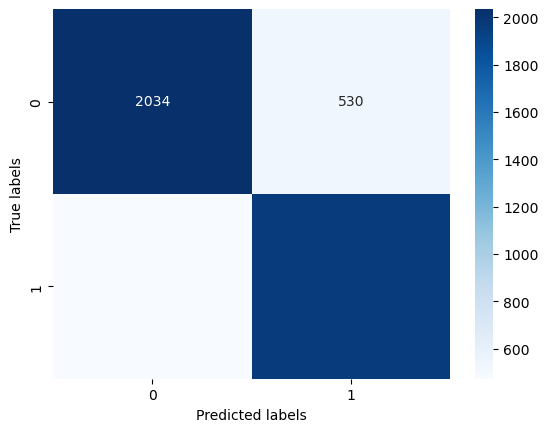

In [43]:
#Confusion matrix
cm = confusion_matrix(Y_pred, Y_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

##### The SVM model accurately classified Kaggle dataset images of cats and dogs. The confusion matrix visualized its performance, revealing precise predictions for both classes.